In [913]:
'''
get kaggle dataset
'''
!pip install -q kaggle
!mkdir C:\Users\Roykesydone\.kaggle
!copy kaggle.json C:\Users\Roykesydone\.kaggle.
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list
!kaggle competitions download -c bike-sharing-demand

A subdirectory or file C:\Users\Roykesydone\.kaggle already exists.


        1 file(s) copied.
bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [914]:
!tar -xf bike-sharing-demand.zip

In [915]:
'''
get train/valid dataset
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime


df = pd.read_csv('train.csv')
df.info()
print(df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13 

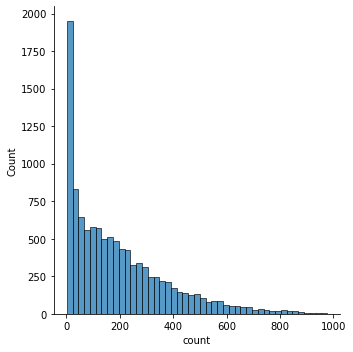

In [916]:
sns.displot(df['count'])

<AxesSubplot:>

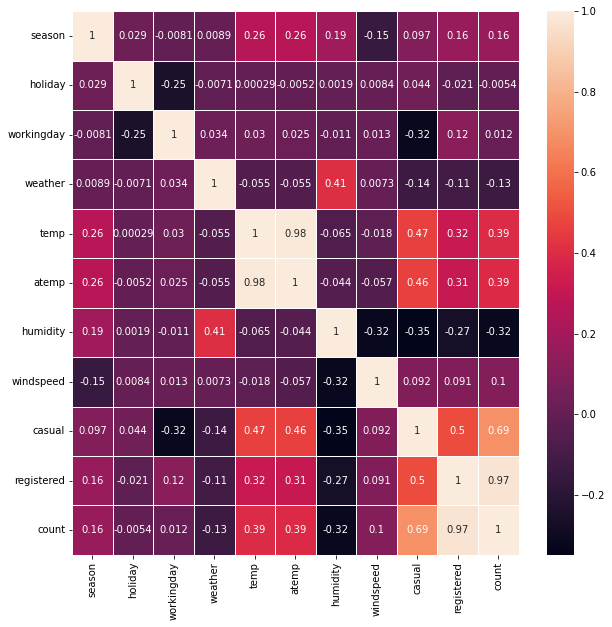

In [917]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True, linewidths=1, ax=ax)

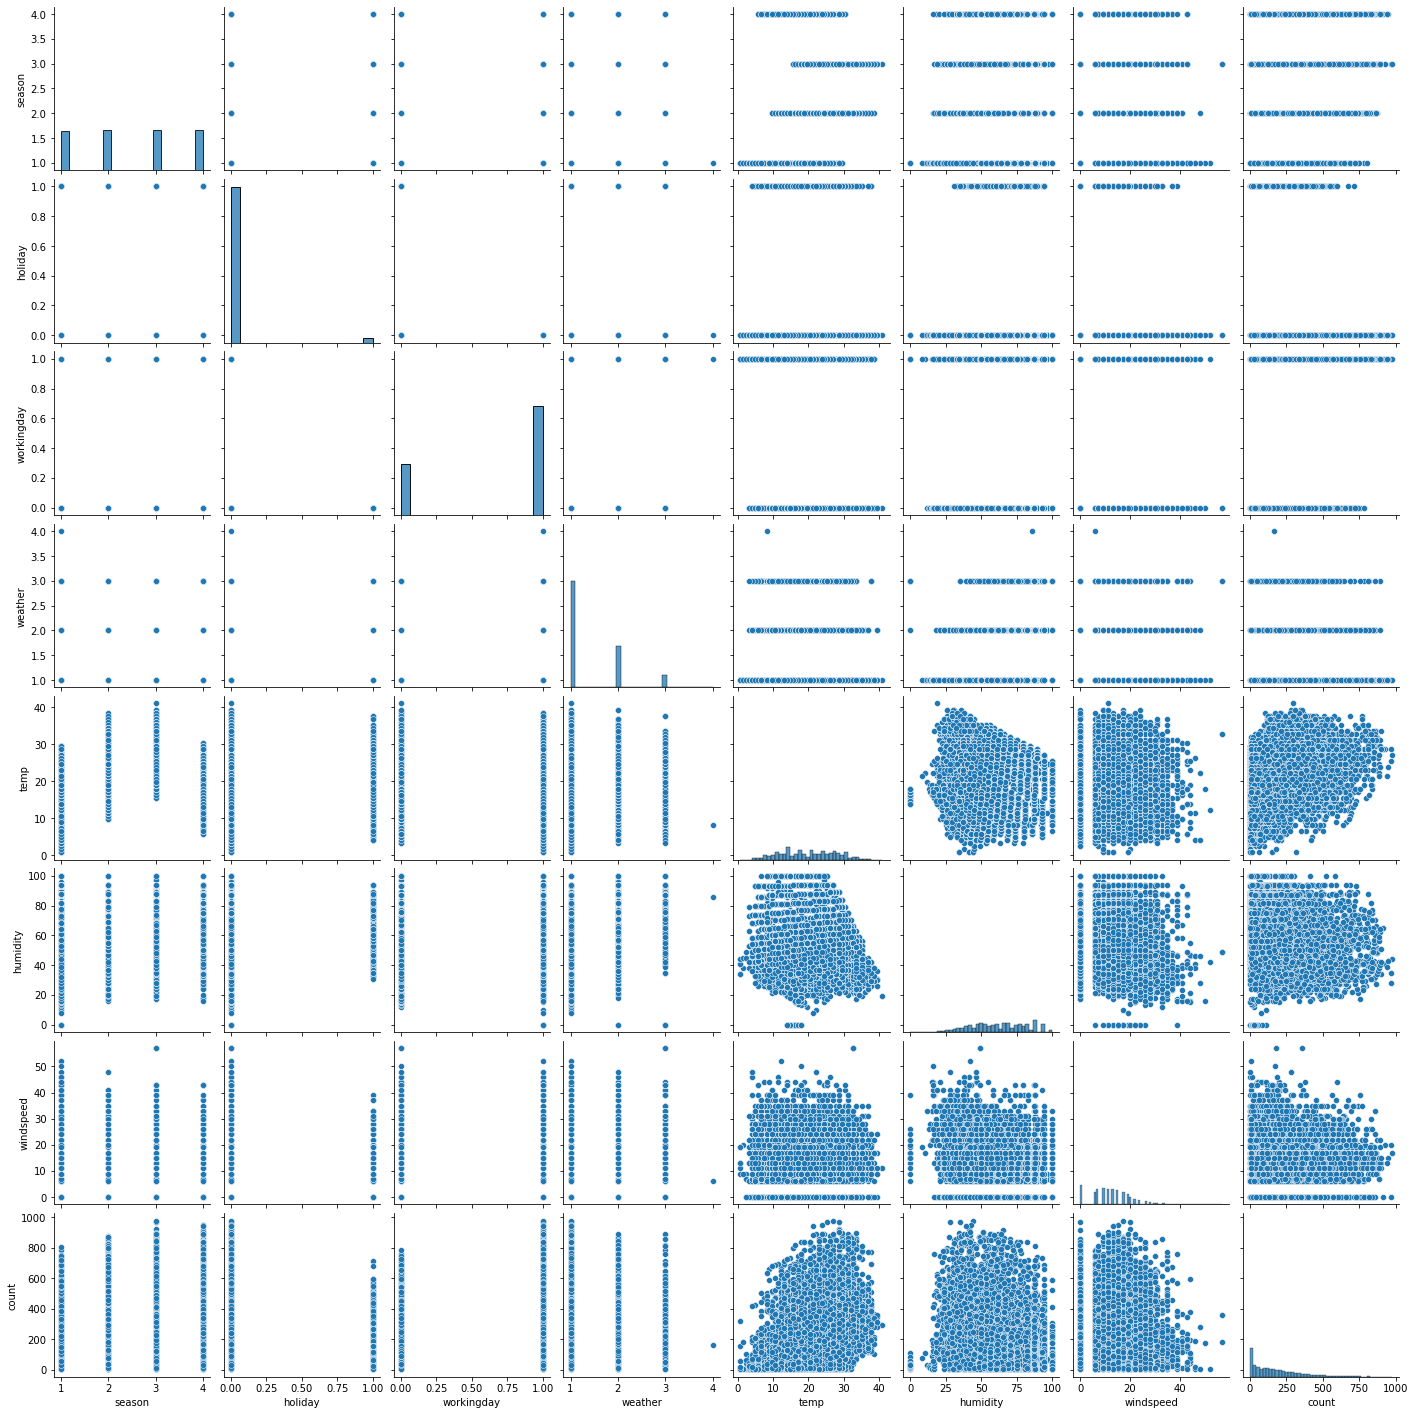

In [918]:
sns.pairplot(df[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed','count']])

In [919]:
def divide_datetime_(df):
    df['year'] = df.datetime.apply(lambda x: x.split('-')[0])
    df['month'] = df.datetime.apply(lambda x: calendar.month_name[datetime.strptime(x.split(' ')[0], "%Y-%m-%d").month])
    df['day'] = df.datetime.apply(lambda x: x.split(' ')[0])
    df['hour'] = df.datetime.apply(lambda x: int(x.split(' ')[1][:2]))
    df['weekday'] = df.datetime.apply(lambda x: calendar.day_name[datetime.strptime(x.split(' ')[0], "%Y-%m-%d").weekday()])

divide_datetime_(df)
    
print(df.columns)
print(df.head(1))

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year    month         day  \
0        81        0.0       3          13     16  2011  January  2011-01-01   

   hour   weekday  
0     0  Saturday  


<AxesSubplot:xlabel='day'>

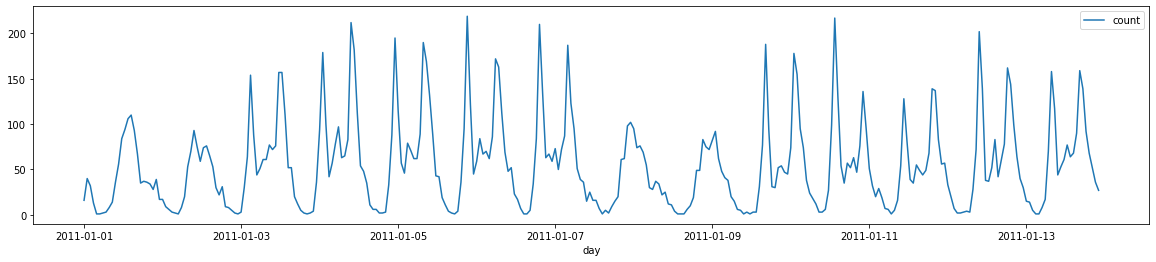

In [920]:
df[df['day'].isin(df['day'].unique()[0:14])].plot(x='day', y='count', figsize=(20, 4))

<Figure size 432x288 with 0 Axes>

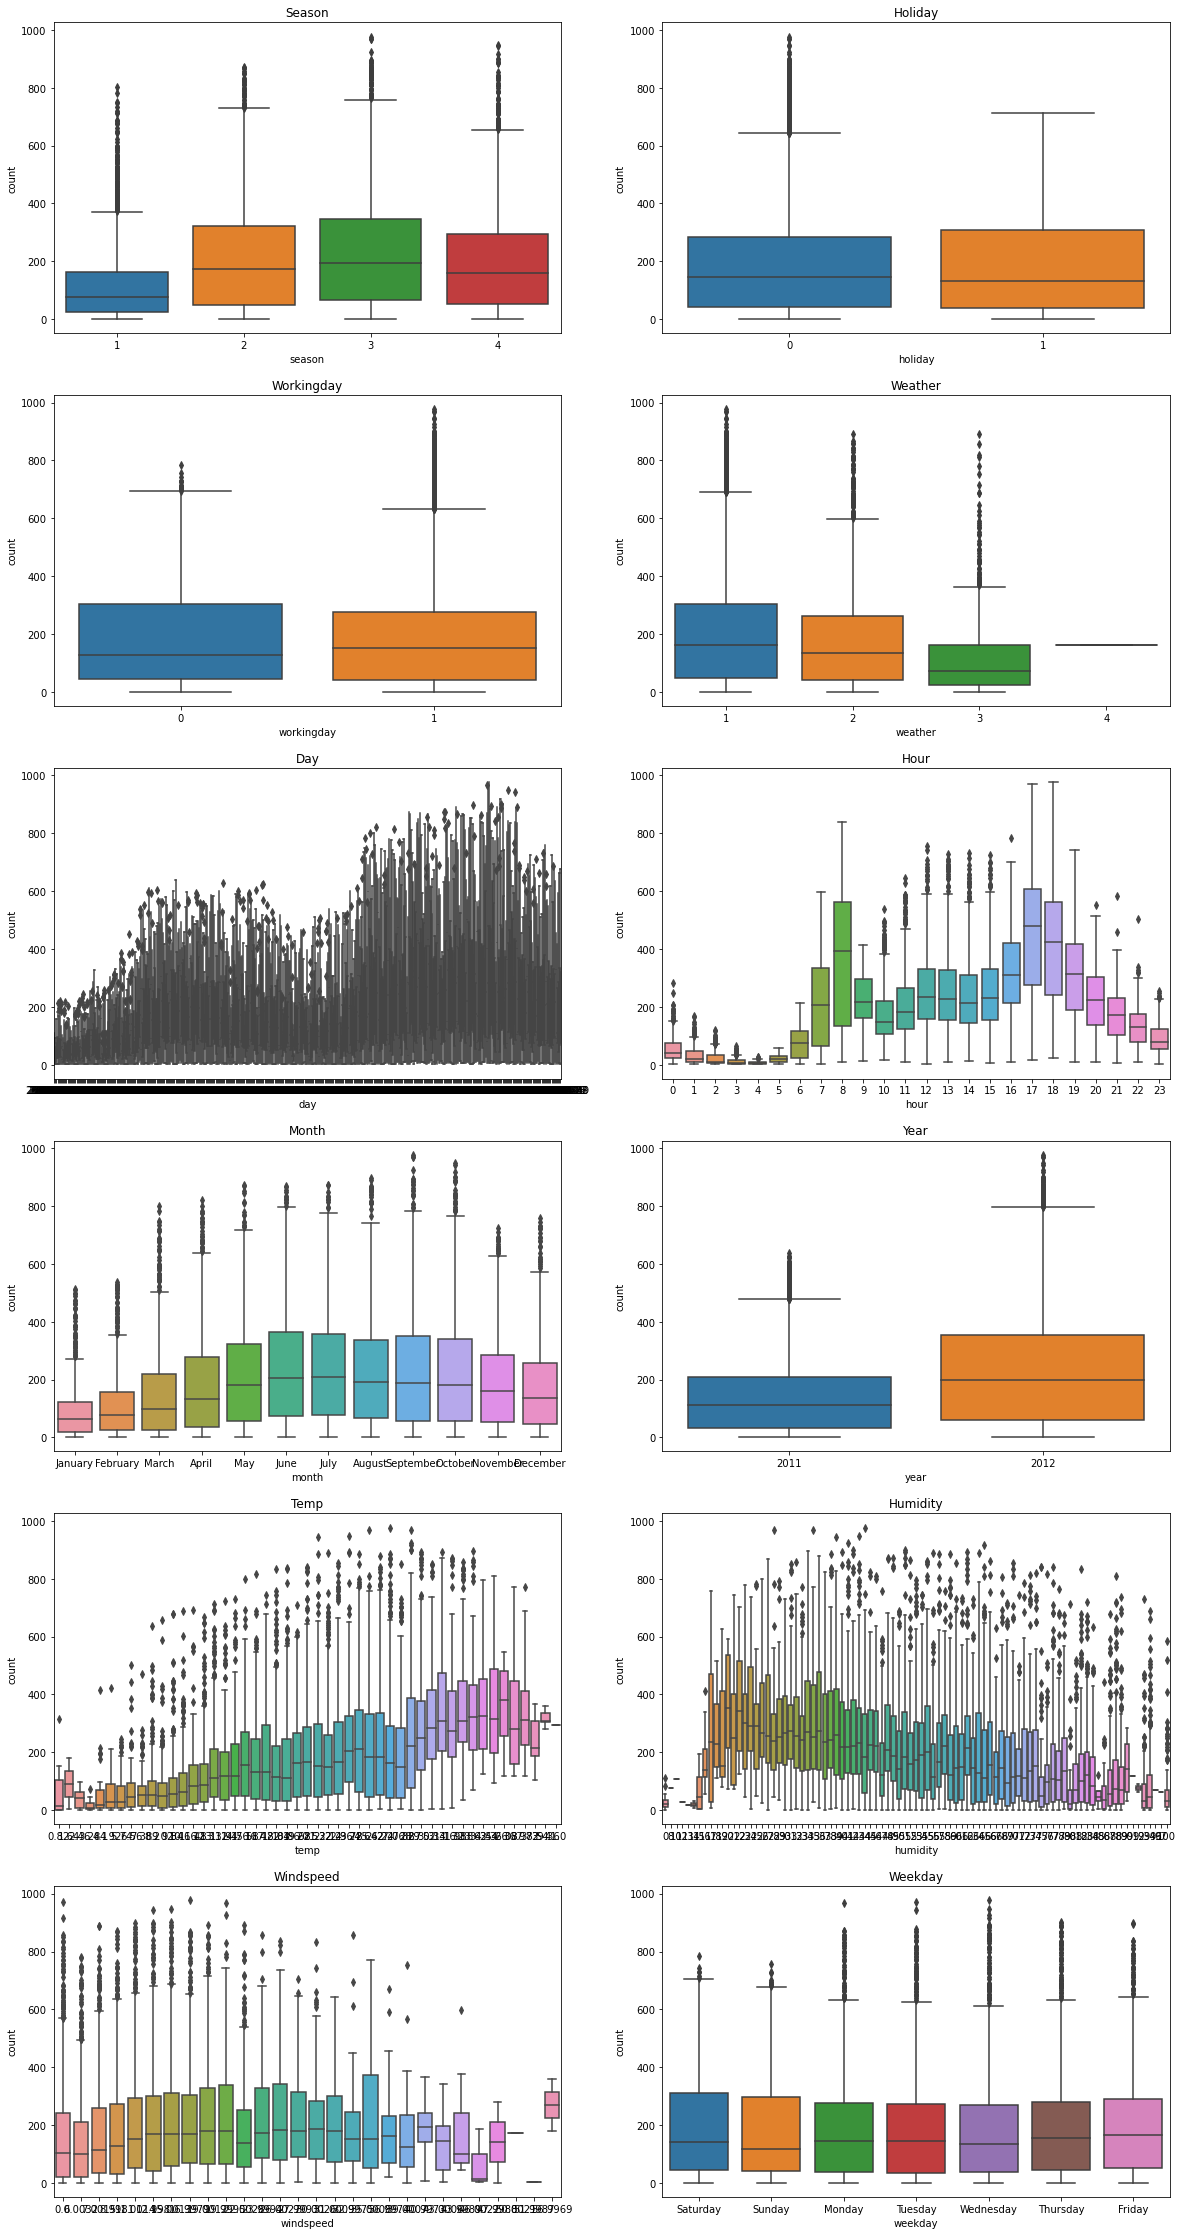

In [921]:
plt.figure()
f, ax = plt.subplots(nrows=6, ncols=2 , figsize=(20,40))

sns.boxplot(data=df, y='count', x='season', ax=ax[0][0]).set(title='Season')
sns.boxplot(data=df, y='count', x='holiday', ax=ax[0][1]).set(title='Holiday')
sns.boxplot(data=df, y='count', x='workingday', ax=ax[1][0]).set(title='Workingday')
sns.boxplot(data=df, y='count', x='weather', ax=ax[1][1]).set(title='Weather')
sns.boxplot(data=df, y='count', x='day', ax=ax[2][0]).set(title='Day')
sns.boxplot(data=df, y='count', x='hour', ax=ax[2][1]).set(title='Hour')
sns.boxplot(data=df, y='count', x='month', ax=ax[3][0]).set(title='Month')
sns.boxplot(data=df, y='count', x='year', ax=ax[3][1]).set(title='Year')
sns.boxplot(data=df, y='count', x='temp', ax=ax[4][0]).set(title='Temp')
sns.boxplot(data=df, y='count', x='humidity', ax=ax[4][1]).set(title='Humidity')
sns.boxplot(data=df, y='count', x='windspeed', ax=ax[5][0]).set(title='Windspeed')
sns.boxplot(data=df, y='count', x='weekday', ax=ax[5][1]).set(title='Weekday')

plt.show()

season     1.000000
count     28.292035
dtype: float64
             count                                    
season           1           2           3           4
hour                                                  
0        28.292035   58.473684   75.675439   57.877193
1        18.761062   35.640351   44.831858   36.166667
2        13.205607   23.482456   31.707965   22.684211
3         7.760417   11.714286   15.778761   11.169643
4         3.336634    6.628319    8.087719    7.228070
5        10.300000   20.377193   25.728070   22.333333
6        42.725664   82.982456   96.780702   82.254386
7       124.433628  232.263158  264.035088  230.956140
8       253.345133  390.192982  403.508772  403.070175
9       154.442478  240.298246  250.710526  241.078947
10      102.168142  192.728070  218.535088  186.298246
11      122.601770  239.078947  256.877193  223.368421
12      154.412281  286.026316  307.017544  278.578947
13      160.771930  289.991228  304.421053  275.964912
14      15

<AxesSubplot:xlabel='hour'>

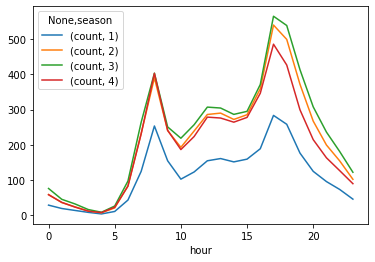

In [922]:

print(df[(df['hour']==0) & (df['season']==1)][['season','count']].mean())
print(df.pivot_table(index=['hour'], columns=['season'], values=['count']).head(30))# 取平均
df.pivot_table(index=['hour'], columns=['season'], values=['count']).plot()

In [923]:
print(df.columns)
print(df.head(3))

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year    month         day  \
0        81        0.0       3          13     16  2011  January  2011-01-01   
1        80        0.0       8          32     40  2011  January  2011-01-01   
2        80        0.0       5          27     32  2011  January  2011-01-01   

   hour   weekday  
0     0  Saturday  
1     1  Saturday  
2     2  Saturday  


In [924]:
df_col_filtered = df.drop(['datetime', 'atemp', 'casual', 'registered'], axis=1)
print(df_col_filtered.columns)
print(df_col_filtered.head(2))

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')
   season  holiday  workingday  weather  temp  humidity  windspeed  count  \
0       1        0           0        1  9.84        81        0.0     16   
1       1        0           0        1  9.02        80        0.0     40   

   year    month         day  hour   weekday  
0  2011  January  2011-01-01     0  Saturday  
1  2011  January  2011-01-01     1  Saturday  


In [925]:
def z_score_standard_(df, cols, train_flag, mean_dict, std_dict):
    
    for col in cols:
        if col in df.columns:
            if train_flag:
                mean_dict[col] = df[col].mean()
                std_dict[col] = df[col].std()
            df['z_score_' + col] = (df[col] - mean_dict[col])/ std_dict[col]
    
    return mean_dict, std_dict

In [926]:
z_score_column = ['temp', 'humidity']

mean_dict = {}
std_dict = {}
z_score_standard_(df_col_filtered, z_score_column, True, mean_dict, std_dict)

for col in z_score_column:
    if col in df_col_filtered.columns:
        df_col_filtered = df_col_filtered.drop([col], axis=1)

print(df_col_filtered.columns)
print(df_col_filtered.head(2))

Index(['season', 'holiday', 'workingday', 'weather', 'windspeed', 'count',
       'year', 'month', 'day', 'hour', 'weekday', 'z_score_temp',
       'z_score_humidity'],
      dtype='object')
   season  holiday  workingday  weather  windspeed  count  year    month  \
0       1        0           0        1        0.0     16  2011  January   
1       1        0           0        1        0.0     40  2011  January   

          day  hour   weekday  z_score_temp  z_score_humidity  
0  2011-01-01     0  Saturday     -1.333599          0.993167  
1  2011-01-01     1  Saturday     -1.438841          0.941206  


In [927]:
'''
one-hot encoding
'''

def one_hot_encoding(df, one_hot_cols):
    NEW_COLUMNS = ['count', 'z_score_temp', 'z_score_humidity', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'year_2011', 'year_2012', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September',  'workingday', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'day']
    
    for col in one_hot_cols:
        if col in df.columns:
            df = df.join(pd.get_dummies(df[col], prefix=col))
            df = df.drop([col], axis=1)
    df = pd.DataFrame(df, columns=NEW_COLUMNS)
    df = df.fillna(0)
    
    return df
    
        
one_hot_cols = ['season', 'weather', 'year', 'hour', 'month', 'weekday']

df_col_filtered = one_hot_encoding(df_col_filtered, one_hot_cols)


print(df_col_filtered.columns)
print(df_col_filtered.head(1))

Index(['count', 'z_score_temp', 'z_score_humidity', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'year_2011', 'year_2012', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'workingday', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'day'],
      dtype='object')
   count  z_score_temp  z_score_humidity  season_1  season_2  season_3  \
0     16     -1.333599          0.993167     

In [965]:
train = df_col_filtered.sample(frac=0.7,random_state=325).drop(labels=['day'],axis=1)
valid = df_col_filtered.drop(train.index).drop(labels=['day'],axis=1)
# train = df_col_filtered[:int(df_col_filtered.shape[0]*0.8)].drop(labels=['day'],axis=1)
# valid = df_col_filtered[int(df_col_filtered.shape[0]*0.8):].drop(labels=['day'],axis=1)

train_x = train.drop(labels=['count'],axis=1)
train_y = train['count']
valid_x = valid.drop(labels=['count'],axis=1)
valid_y = valid['count']


print(f'total: {df_col_filtered.shape[0]}, train: {train.shape[0]}, valid: {valid.shape[0]}')

print(train_x.columns)
print(train_x.head(3))

total: 10886, train: 7620, valid: 3266
Index(['z_score_temp', 'z_score_humidity', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'year_2011', 'year_2012', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'workingday', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')
      z_score_temp  z_score_humidity  season_1  season_2  season_3  season_4  \
7743      0.2450

In [966]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
print(torch.__version__)
print("cuda:0" if torch.cuda.is_available() else "cpu")

1.9.0+cu111
cuda:0


In [967]:
class NN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, 1),
        )

    def forward(self, input):
        out = self.fc(input)
        # print(out[0])
        return out

In [968]:
input_dims = train_x.shape[1]

model = NN(input_dims)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device: ', device)
model.to(device)

device:  cuda:0


NN(
  (fc): Sequential(
    (0): Linear(in_features=56, out_features=16, bias=True)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [969]:
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(torch.clip(pred + 1,min=1e-5, max=None)), torch.log(torch.clip(actual + 1,min=1e-5, max=None))))

In [970]:
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))

In [971]:
'''
hyperparameters
'''
epochs = 1000
learning_rate = 0.01
batch_size = 128
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 
# criterion = nn.MSELoss()
criterion = RMSLELoss()
# criterion = RMSELoss()

In [972]:

train_inputs = torch.tensor(train_x.values.tolist(), dtype=torch.float).to(device)
# train_inputs = torch.unsqueeze(train_inputs, dim=1)

train_labels = torch.tensor(train_y.values.tolist(), dtype=torch.float).to(device)
# train_labels = tensor_to_one_hot(train_labels, 2, device)


valid_inputs = torch.tensor(valid_x.values.tolist(), dtype=torch.float).to(device)

valid_labels = torch.tensor(valid_y.values.tolist(), dtype=torch.float).to(device)
# valid_labels = tensor_to_one_hot(valid_labels, 2, device)

train_dataset = TensorDataset(train_inputs, train_labels)
trainLoader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)


best_loss = 1000000000
best_accuracy = 0 
last_update_cnt = 0

for epoch_index, epoch in enumerate(range(epochs), 0):
    model.train()
    batch_loss = []
    for i, batch in enumerate(trainLoader, 0):
        inputs, labels = batch
        
        optimizer.zero_grad() 
        outputs = model(inputs) 
#         print(outputs.shape, labels.shape, labels.unsqueeze(dim = 1).shape)
#         print(outputs[:3], labels[:3])
        loss = criterion(outputs, labels.unsqueeze(dim=1))
        batch_loss.append(loss.cpu().data.numpy())
        loss.backward() 
        optimizer.step() 

    
    if  epoch_index % 1 == 0:
        print("epoches: ", epoch_index, "loss: ", np.mean(batch_loss))
        model.eval()
        with torch.no_grad():
            outputs = model(valid_inputs)
#         print(outputs[0], valid_labels[0])
#         print(outputs.shape, valid_labels.shape)
            loss = criterion(outputs, valid_labels.unsqueeze(dim=1))
            loss = np.mean(loss.cpu().data.numpy())
            last_update_cnt += 1
            if loss < best_loss:
                best_loss = loss
                last_update_cnt = 0
                torch.save(model.state_dict(), "model.pk1") 
    
        print("valid - epoches: ", epoch_index, "loss: ", loss)
        if last_update_cnt == 10:
            print('might aleready become convergence')
            break

print('best loss in valid: ', best_loss)

epoches:  0 loss:  4.3091025
valid - epoches:  0 loss:  4.0669503
epoches:  1 loss:  3.861603
valid - epoches:  1 loss:  3.763925
epoches:  2 loss:  3.6269727
valid - epoches:  2 loss:  3.566388
epoches:  3 loss:  3.4519691
valid - epoches:  3 loss:  3.4166124
epoches:  4 loss:  3.3159173
valid - epoches:  4 loss:  3.2931902
epoches:  5 loss:  3.1966622
valid - epoches:  5 loss:  3.1849449
epoches:  6 loss:  3.09848
valid - epoches:  6 loss:  3.0886748
epoches:  7 loss:  3.0054216
valid - epoches:  7 loss:  2.9974213
epoches:  8 loss:  2.920408
valid - epoches:  8 loss:  2.9196198
epoches:  9 loss:  2.8456385
valid - epoches:  9 loss:  2.8451552
epoches:  10 loss:  2.7766562
valid - epoches:  10 loss:  2.7800853
epoches:  11 loss:  2.7094781
valid - epoches:  11 loss:  2.7159178
epoches:  12 loss:  2.649055
valid - epoches:  12 loss:  2.662273
epoches:  13 loss:  2.589455
valid - epoches:  13 loss:  2.5955858
epoches:  14 loss:  2.5347774
valid - epoches:  14 loss:  2.5525808
epoches: 

epoches:  122 loss:  0.75974685
valid - epoches:  122 loss:  0.76309544
epoches:  123 loss:  0.7551394
valid - epoches:  123 loss:  0.7766106
epoches:  124 loss:  0.7513092
valid - epoches:  124 loss:  0.7621006
epoches:  125 loss:  0.74698615
valid - epoches:  125 loss:  0.75473356
epoches:  126 loss:  0.74175155
valid - epoches:  126 loss:  0.7550818
epoches:  127 loss:  0.7349848
valid - epoches:  127 loss:  0.75195634
epoches:  128 loss:  0.734613
valid - epoches:  128 loss:  0.73975635
epoches:  129 loss:  0.7293053
valid - epoches:  129 loss:  0.7398964
epoches:  130 loss:  0.7275331
valid - epoches:  130 loss:  0.7307677
epoches:  131 loss:  0.7197649
valid - epoches:  131 loss:  0.7335783
epoches:  132 loss:  0.7213914
valid - epoches:  132 loss:  0.73521835
epoches:  133 loss:  0.7149125
valid - epoches:  133 loss:  0.71923524
epoches:  134 loss:  0.71155035
valid - epoches:  134 loss:  0.72204757
epoches:  135 loss:  0.7077607
valid - epoches:  135 loss:  0.71277684
epoches: 

epoches:  238 loss:  0.5325628
valid - epoches:  238 loss:  0.5278077
epoches:  239 loss:  0.5293428
valid - epoches:  239 loss:  0.5339951
epoches:  240 loss:  0.52861637
valid - epoches:  240 loss:  0.52993584
epoches:  241 loss:  0.52434474
valid - epoches:  241 loss:  0.5272845
epoches:  242 loss:  0.5279488
valid - epoches:  242 loss:  0.5276442
epoches:  243 loss:  0.5225419
valid - epoches:  243 loss:  0.52173054
epoches:  244 loss:  0.5303931
valid - epoches:  244 loss:  0.5280941
epoches:  245 loss:  0.5253091
valid - epoches:  245 loss:  0.5246115
epoches:  246 loss:  0.52380115
valid - epoches:  246 loss:  0.5266674
epoches:  247 loss:  0.5225681
valid - epoches:  247 loss:  0.5261377
epoches:  248 loss:  0.5189741
valid - epoches:  248 loss:  0.5213176
epoches:  249 loss:  0.524935
valid - epoches:  249 loss:  0.5255179
epoches:  250 loss:  0.52396095
valid - epoches:  250 loss:  0.5200801
epoches:  251 loss:  0.5238306
valid - epoches:  251 loss:  0.5207455
epoches:  252 l

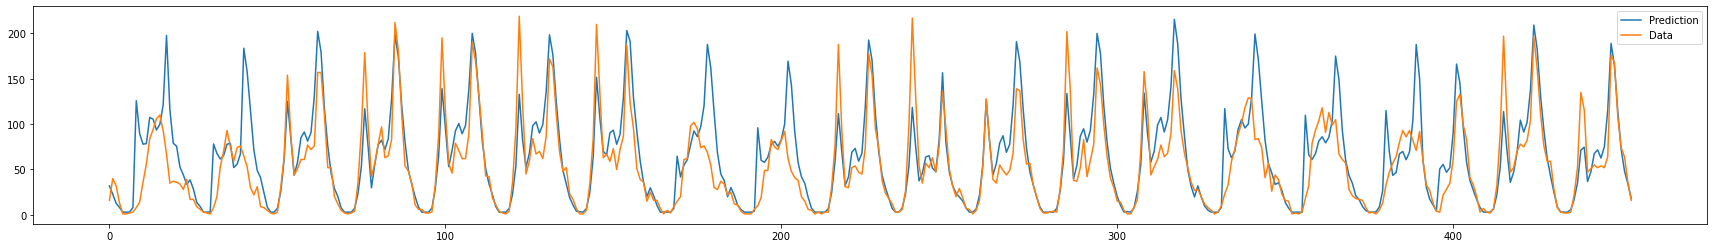

In [973]:
model.load_state_dict(torch.load("model.pk1")) 
model.eval()

test_df = df_col_filtered[df_col_filtered['day'].isin(df_col_filtered['day'].unique()[:20])]

test_x = test_df.drop(labels=['count', 'day'],axis=1)
# print(test_x.values.tolist())
plot_pred = model(torch.tensor(test_x.values.tolist(), dtype=torch.float).to(device))
# print(plot_pred, test_df['count'])
fig, ax = plt.subplots(figsize=(30,4))
test_df = test_df['count'].reset_index()
ax.plot(plot_pred.cpu().detach().numpy(), label='Prediction')
ax.plot(test_df['count'], label='Data')
ax.legend()
# print(plot_pred.cpu().detach().numpy().shape)
# print(test_df['count'].reset_index())


# df[df['day'].isin(df['day'].unique()[0:14])].plot(x='day', y='count', figsize=(20, 4))

In [974]:
data = pd.read_csv('test.csv')

divide_datetime_(data)

# print(data.columns)
# print(mean_dict, std_dict)
z_score_standard_(data, z_score_column, False, mean_dict, std_dict)
# print(data.columns)


data = one_hot_encoding(data, one_hot_cols).drop(['day'], axis=1)
print(data.columns)
print(data.head(1))
data = torch.tensor(data.values.tolist(), dtype=torch.float).to(device)

model.load_state_dict(torch.load("model.pk1")) 
model.eval()
with torch.no_grad():
    outputs = model(data)
    outputs = torch.clip(outputs,min=0, max=None)
# print(outputs)
    
submission = pd.read_csv('./sampleSubmission.csv')
submission['count'] = outputs.cpu()
submission.to_csv('./sampleSubmission.csv', index=False)

Index(['count', 'z_score_temp', 'z_score_humidity', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'year_2011', 'year_2012', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'workingday', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')
   count  z_score_temp  z_score_humidity  season_1  season_2  season_3  \
0    0.0     -1.228358         -0.305869         1  

score: 1.0 (pretty bad)
有空再改